<a href="https://colab.research.google.com/github/manujsinghwal/website-traffic-analysis/blob/main/website_traffic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Website Traffic Analysis
The data set provided [traffic.csv](https://drive.google.com/file/d/19PybizoyiN0-nLUvems6X0ru5jqB927r/view?usp=sharing) contains web traffic data (`"events"`) from a few different pages (`"link_id"`) over a period of 7 days including various categorical dimensions about the geographic origin of that traffic as well as a page's content: `isrc`.

Our goal is to understand this traffic better, in particular the volume and distribution of events, and to develop ideas on how to increase the links' click rates. With that in mind, we'll analyze the data and providing answers to the presented questions.

In [ ]:
# Mounting Google drive as traffic.csv file stored in a drive directory
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Exploratory Data Analysis
We will start by loading the required libraries. We'll use Pandas to create and analyse the data set. For some mathematical operations, the Numpy library may come in handy.

In [95]:
# Importing libraries
import pandas as pd
import numpy as np

Now, we'll read traffic.csv file from Google drive using pd.read_csv() function.

In [98]:
# Reading csv file from Google drive directory
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/traffic.csv')

In [99]:
# Checking the number of rows and columns in dataset
df.shape

(226278, 9)

In [100]:
# Printing the first five records from this dataset
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


We can use the `describe()` method to print some descriptive statistics about each column. We can observe the number of non-null values in the count row, then the number of unique values, followed by the most frequent value and its count. Because all of our columns are of type object, as we can see in the output of the `info()` method in the next cell below, the descriptive statistics provide a summary that is relevant to a categorical attribute. If, for example, we were to have a numerical column, the describe() method would output different properties, like mean, max, min value, etc.

In [ ]:
# Printing descriptive statistics about each column
df.describe()

,event,date,country,city,artist,album,track,isrc,linkid
count,226278,226278,226267,226267,226241,226273,226273,219157,226278
unique,3,7,211,11993,2419,3254,3562,709,3839
top,pageview,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,142015,35361,47334,22791,40841,40841,40841,40841,40841


In the table above, the `count` presents the number of non-null values for a particular column in the data set, `unique` is the number of unique (different) values that we have, `top` is the most frequent value and `freq` is the count of the most frequent value.

For example, for the column `event` we have `226278` non-null values, `3` unique values, and the most frequent event is `pageview` with `142015` occurrences.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


The `info()` provides us with information about the size of the data set in terms of memory usage, the type of the columns and the non-null count for each column.

### Question 1
**How many total pageview events did the links in the provided dataset receive in the full period, how many per day?**
\
In the preliminary analysis, we observed that the pageview event is the most frequent event in the data and that there are 3 types of events in the data (see the output of below cell).

To print each unique value of the event column, alongside a count of its occurrences, we can use the `value_counts()` method. The output for the pageview events is `142,015`, so that is our total number of such events. Another solution for it would be to filter the data set to contain only the pageview events and then to read the number of rows in the filtered data set.

In [ ]:
# Checking distinct values and their count in event column
df['event'].value_counts()

event
pageview    142015
click        55732
preview      28531
Name: count, dtype: int64

In [ ]:
# Pageview events count
page_view_events = (
    df
    .query('event == "pageview"')
    .shape[0]
)
page_view_events

142015

Getting the number of `pageview` events per day requires the application of the `groupby()` method.

To put it in simpler terms, and to answer the question, we need to group the pageview events by the date and then count their occurrence. This is achieved in the following cell.

In [ ]:
# Pageview events per day
page_view_events_per_day = (
    df
    .query('event == "pageview"')
    .groupby('date')['event']
    .count()
    .reset_index(name='total_pageview_events')
    .sort_values(by='date')
)
page_view_events_per_day

,date,total_pageview_events
0,2021-08-19,22366
1,2021-08-20,21382
2,2021-08-21,21349
3,2021-08-22,20430
4,2021-08-23,18646
5,2021-08-24,18693
6,2021-08-25,19149


Please note that company allow for duplicates in the data, i.e., if the same user views the same page multiple times, it will be counted each time. We can use `drop_duplicates()` to modify this behaviour and see the difference. The following cells illustrate the difference in the data caused after deduplicating: the number of events lowers by nearly half.

In [ ]:
# Dropping duplicates in DataFrame
df_deduplicated = df.drop_duplicates()

In [ ]:
# Checking distinct values and their count in event column after deduplication
df_deduplicated['event'].value_counts()

event
pageview    73360
click       32499
preview     16708
Name: count, dtype: int64

In [ ]:
# Pageview events count after deduplication
page_view_events_deduplicated = (
    df_deduplicated
    .query('event == "pageview"')
    .shape[0]
)
page_view_events_deduplicated

73360

In [ ]:
# Pageview events per day after deduplication
page_view_events_per_day_deduplicated = (
    df_deduplicated
    .query('event == "pageview"')
    .groupby('date')['event']
    .count()
    .reset_index(name='total_pageview_events')
    .sort_values(by='date')
)
page_view_events_per_day_deduplicated

,date,total_pageview_events
0,2021-08-19,13006
1,2021-08-20,11088
2,2021-08-21,9939
3,2021-08-22,9982
4,2021-08-23,9722
5,2021-08-24,9705
6,2021-08-25,9918


### Question 2
**What about the other recorded events?**
\
In the above analysis, we obeserved the results for `pageview` event. Now, we'll remove the `pageview` event from the DataFrame and take a look on the other remaining events.

In [ ]:
# Checking the unique events in DataFrame and saving them to a set variable
unique_events = set(df['event'].unique())

In [ ]:
# Discarding 'pageview' event from unique_events
unique_events.discard('pageview')
unique_events

{'click', 'preview'}

In [ ]:
# Looping over each event
for recorded_event in unique_events:
  # Calculating the event count
  total_events = df[df['event'] == recorded_event].shape[0]
  print('Total number of', recorded_event, 'events is', total_events)
  # Per day events count
  events_per_day = (
      df
      .query('event == @recorded_event')
      .groupby('date')['event']
      .count()
      .reset_index(name='total_events')
      .sort_values(by='date')
      )
  print('\nEvents/Day:\n', events_per_day)
  print('\n')

Total number of preview events is 28531

Events/Day:
          date  total_events
0  2021-08-19          3788
1  2021-08-20          4222
2  2021-08-21          4663
3  2021-08-22          4349
4  2021-08-23          3847
5  2021-08-24          3840
6  2021-08-25          3822


Total number of click events is 55732

Events/Day:
          date  total_events
0  2021-08-19          9207
1  2021-08-20          8508
2  2021-08-21          8071
3  2021-08-22          7854
4  2021-08-23          7315
5  2021-08-24          7301
6  2021-08-25          7476




Let's calculate the total daily event count with deduplicated data. The following cells illustrate the difference in the summary caused after deduplicating.

In [ ]:
# Checking the unique events in deduplicated DataFrame and saving them to a set variable
unique_events_deduplicated = set(df_deduplicated['event'].unique())

In [ ]:
# Discarding 'pageview' event from unique_events
unique_events_deduplicated.discard('pageview')
unique_events_deduplicated

{'click', 'preview'}

In [ ]:
# Looping over each event
for recorded_event in unique_events:
  # Calculating the event count
  total_events = df_deduplicated[df_deduplicated['event'] == recorded_event].shape[0]
  print('Total number of unique', recorded_event, 'events is', total_events)
  # Per day events count
  events_per_day = (
      df_deduplicated
      .query('event == @recorded_event')
      .groupby('date')['event']
      .count()
      .reset_index(name='total_events')
      .sort_values(by='date')
      )
  print('\n Unique events/day:\n', events_per_day)
  print('\n')

Total number of unique preview events is 16708

 Unique events/day:
          date  total_events
0  2021-08-19          2290
1  2021-08-20          2449
2  2021-08-21          2483
3  2021-08-22          2524
4  2021-08-23          2379
5  2021-08-24          2355
6  2021-08-25          2228


Total number of unique click events is 32499

 Unique events/day:
          date  total_events
0  2021-08-19          5860
1  2021-08-20          4999
2  2021-08-21          4279
3  2021-08-22          4421
4  2021-08-23          4314
5  2021-08-24          4231
6  2021-08-25          4395




### Question 3
**Which countries got the highest `click` events? Can we get a list of top 5 countries with `click` events?**
\
To achieve this, we need to filter the original DataFrame for `click` events and group by with total count of events. After this, we can perform ascending operation based on the event count.

In [101]:
# Grouping data based on 'click' events
click_events = (
    df
    .query('event == "click"')
    .groupby('country')['event']
    .count()
    .reset_index(name='total_clicks')
    .sort_values(by='total_clicks', ascending=False)
    .reset_index(drop=True)
)

# Showing top 5 countries for 'click' event count
click_events.head()

,country,total_clicks
0,India,11609
1,United States,9533
2,Saudi Arabia,9495
3,France,4054
4,Iraq,1836


### Question 4
**What was the overall click rate (clicks/pageviews) per link? Also, can we extract the top 10 link with highest click rate?**
\
The click rate is the number of clicks that a page has received (`event = 'click'`) divided by the number of times it has been shown (`event = 'pageview'`). It is a commonly used metric that measures the success of an advertising campaign.
\
To start with, we can count the number of times each link has been clicked on, and the number of times each link has been viewed. The same procedure applies to both calculations. We first filter for the proper event (`click` or `pageview`), then we group the filtered data by the `linkid` and count the occurrences of that event.

In [63]:
# Calculating the total clicks for every linkid
clicks = (
    df
    .query('event == "click"')
    .groupby('linkid')['event']
    .count()
    .reset_index(name='click_count')
)

# Calculating the total pageview for every linkid
pageview = (
    df
    .query('event == "pageview"')
    .groupby('linkid')['event']
    .count()
    .reset_index(name='pageview_count')
)

# Merging clicks and pageview to calculate click rate
click_rate = pd.merge(
    clicks,
    pageview,
    on='linkid'
)
click_rate['clicks/pageview'] = click_rate['click_count']/click_rate['pageview_count']
click_rate

,linkid,click_count,pageview_count,clicks/pageview
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2,1.000000
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1,1.000000
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3,0.666667
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36,0.222222
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4,0.750000
...,...,...,...,...
2248,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29,84,0.345238
2249,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1,1.000000
2250,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1,1.000000
2251,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,2,0.500000


In [64]:
# Extracting the top 10 link with highest click rate
top_10_links = (
    click_rate
    .sort_values(by='clicks/pageview', ascending=False)
    .head(10)
)
top_10_links

,linkid,click_count,pageview_count,clicks/pageview
1789,c95f1fc1-fab0-4c74-b3f5-52bd3684a713,923,10,92.3
470,330773a6-f22a-5c7a-a3e4-7809fe8539b9,3,1,3.0
371,27a91fe1-9fc0-5c28-9e9e-19ff0e7357a7,3,1,3.0
1739,c2d99bb2-6ea3-568c-80d3-44dc36250cbc,2,1,2.0
172,132c744a-d87b-5ed6-aff2-d9b8c718a4ea,2,1,2.0
2189,f8995840-5284-5961-b9dd-b7b34c437476,2,1,2.0
571,3e7fb196-61dc-4d8e-b296-925e9c9c778e,2,1,2.0
2054,e82e2452-dc28-5799-be34-1b4fdd82f0a6,2,1,2.0
1890,d4a21b72-aeee-5e11-a1a6-8928ec8bebdc,2,1,2.0
863,5e6c612c-0672-4b78-8a3a-11c1e2dcaf43,2,1,2.0


### Question 5
**How does the click rate distribute across different links?**
\
To get a sense of the distribution of the click rate across different links, we can use the describe() method. The cell below does that. Observe the output. We have the count (number of links), the mean, standard deviation, min, max, as well as the value of the click rate at the 25, 50, and 75th percentile.

In [67]:
click_rate['clicks/pageview'].describe()

count    2253.000000
mean        0.809920
std         1.958030
min         0.090909
25%         0.500000
50%         1.000000
75%         1.000000
max        92.300000
Name: clicks/pageview, dtype: float64

Tabular data can only give us the above insights, so we can try to plot the data and visualize some insights.

Using the plot() method we plot a histogram with 100 bins.

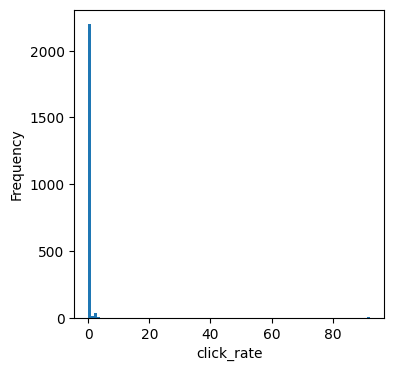

In [105]:
ax = click_rate['clicks/pageview'].plot(kind='hist', figsize=(4, 4), bins=100)
_ = ax.set_xlabel('click_rate')

The histogram shows that the data is highly skewed to left, i.e., many of its values are very close to zero. In such cases, a common workaround is to plot the histogram of the logarithm of the data. Let us try that, we can use Numpy's log2() method for it!

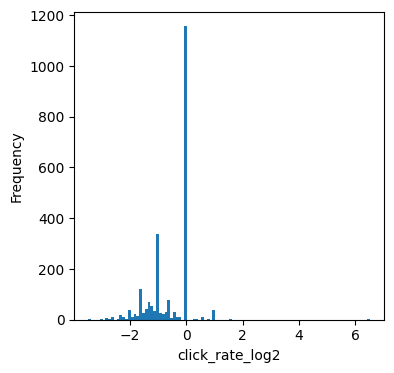

In [106]:
# Because the data is highly skewed, it makes more sense to plot the log of it
click_rate['click_rate_log2'] = np.log2(click_rate['clicks/pageview'])
ax = click_rate['click_rate_log2'].plot(kind='hist', figsize=(4, 4), bins=100)
_ = ax.set_xlabel('click_rate_log2')

We observe an enormous spike at the 0 meaning that the actual click rate was 1 (`equivalent to log(0)`), implying that there are many links that have been viewed and clicked on exactly once. There are also, many links that have been viewed many times but clicked on fewer (values less than zero).
\
One last thing we can try is a box plot, which is basically a visualization of the describe() method.

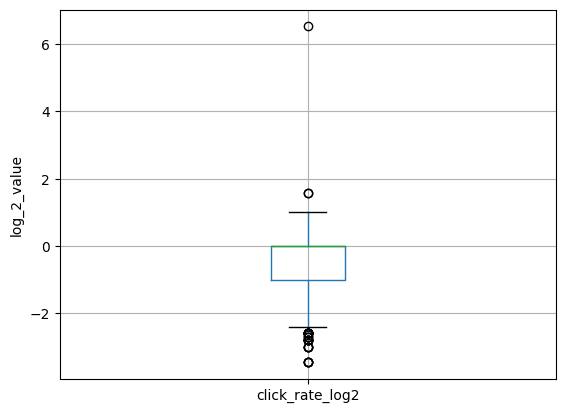

In [107]:
ax = click_rate.boxplot(column='click_rate_log2')
_ = ax.set_ylabel('log_2_value')

We observe two (and one particular) high outliers, and many, many below the Q1 (i.e., click rate very close to zero). Our guess is that there are at least two links, that have been clicked on multiple times in the same page view.

### Question 6
**Is there any linear correlation between clicks and previews on a link? Is it significant? How large is the effect?**
\
Pearson's correlation coefficient is a measure of linear correlation between two data sets. It takes its value in the range of [-1, 1] as:
1. Between -1 and 0 then negative correlation (When one variable changes, the other variable changes in the opposite direction.)
2. 0 then no correlation (There is no relationship between the variables.)
3. Between 0 and 1 then positive correlation (When one variable changes, the other variable changes in the same direction.)

To perform this analysis, we need to repeat the above steps but only for event types lies in clicks and previews.


In [108]:
# Calculating the total pageview for every linkid
preview = (
    df
    .query('event == "preview"')
    .groupby('linkid')['event']
    .count()
    .reset_index(name='preview_count')
)

# Merging clicks and pageview to calculate click rate
corr_analysis = pd.merge(
    clicks,
    preview,
    on='linkid'
)

corr_analysis = corr_analysis[['click_count','preview_count']]
corr_analysis.corr()

,click_count,preview_count
click_count,1.000000,0.993422
preview_count,0.993422,1.000000


Almost perfectly positive correlation between the number of clicks and previews which seems logical; given that the one is actually dependent on the other (can't have clicks without previews and vice versa).